# Clustering

Clustering is an unsupervised algorithm, used to group data (samples) into clusters/groups based on the similarity of their characteristics/features. It partitions the dataset into mutually exclusive groups, with the samples in each group similar to each other, and dissimilar to the samples in other groups.

Application of clustering :

 - can be used in recommendation systems, to find a group of similar items or users, to recommend books/movies.
 - used in banking to identify group of customers: loyal customers or churn customers
 - auto categorizing news based on their content

There are various types of clustering algorithms : partitioning, hierarchical clustering, density bases clustering.

## K-Means Clustering

**K-Means** clustering is one of the simplest model for partition clustering. It divides the data into K non-overlaping subsets (clusters) without any cluster-internal structure. Data samples within a cluster are very similar, and data samples across different clusters are very different. Thus, the objective of K-means is to form clusters in such a way that similar samples go into a cluster and dissimilar samples fall into different cluster. Despite its simplicity, the K-means is vastly used for clustering in many data science applications.

The similarity/dissimilarity between two data points is quantified by the Euclidean distance:

$$\text{distance between data point } i, j = \sqrt{(x_{1,i} - x_{1,j})^2 + (x_{2,i} - x_{2,j})^2 + ...}$$

where $x_1, x_2 ...$ are our feature variables.

Algorithm of K-Means clustering:

 - Step 1 : The first step is to determine the number of clusters K, and initialize centroid for these K clusters randomly. These centroid should be of the same dimension as our feature set. The farther apart the clusters are placed, the better.
 - Step 2 : Now we assign each data point to a cluster. For this purpose, we calculate the distance of all K cluster centroids from the data point, and assign it to the cluster for which the distance is minimum.
 - Step 3 : Following the assigning of data points to clusters, we update the centroid position. The new centroid position of a particular cluster is given by the mean value of all the data points belonging to this cluster.
 - Step 2 (with updated centroid position) and 3 (with reassinging) is repeated till the centroid position stops moving.
 
As K-means is a heurestic algorithm, there is no guarantee that it will converge to the global optimum and the result may depend on initial clusters. It means, the algorithm is guaranteed to converge to a result but the result may be a local minimum. This problem is commonly solved by running the whole process multiple times with different initial conditions. The algorithm is very fast, so running it many times is not a major issue. This algorithm produces sphere-like clusters because the clusters are shaped around the centroid.

**Error metric** to estimate the accuracy of K-means: 
$$\text{average of the distances of the data points from their cluster centroids} = \frac{1}{n}\sum_{i}^{n}(x_i - C_j)^2$$

The appropriate value of K is chosen by elbow method : If we measure error as a function of K, the error always keep decreasing with increasing K. So we choose the value of K, where the rate of decrease sharply shifts. This value of K is the right value to choose for clustering.

In this notebook, we practice K-means clustering with two examples:

 - K-means on a random generated dataset
 - K-means for customer segmentation

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## 1. K-Means on a randomly generated dataset

First, let's create our dataset for this exercise

In [2]:
np.random.seed(0)           # here we set up a random seed, we set seed = 0

We use **make_blobs** class to make random cluster of points

In [3]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples = 5000, centers = [[4,4], [-2,-1], [2,-3], [1,1]], cluster_std = 0.9)

The input to the make_blobs class are:

 - n_samples : The total number of points equally divided among clusters
 - centers : The number of centers to generate, or the fixed center locations
 - cluster_std : The standard deviation of the clusters. The larger the number, the further apart the clusters

The outputs obtained are:

 - X : array of shape [n_samples, n_features] (feature matrix) : the generated samples
 - y : array of shape [n_samples] (response vector) : the integer labels for cluster membership of each sample

Now, let's display the scatter plot of the randomly generated data

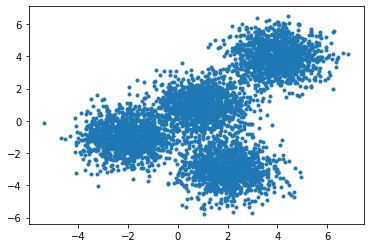

In [4]:
plt.scatter(X[:,0], X[:,1], marker = '.')

**Setting up K-means :** Let's set up K-means clustering, to apply it on our random data

In [5]:
from sklearn.cluster import KMeans

k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

The parameters in KMeans clustering are :

 - init : Initialization method of the centroids. 
   (k-means++ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence)
 - n_clusters : the number of clusters to form, as well as the number of centroids to generate
 - n_init : number of runs with different centroid seeds. The output given by KMeans is the best one obtained in these n_init runs.

Now, let's fit the KMeans model with the feature matrix X:

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We can grab the label for each point using KMeans.labels_ attribute 

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

We can also get the coordinates of the cluster centers using KMeans.cluster_centers_

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

Let's visualize the randomly generated datapoints clustered together using K-means clustering

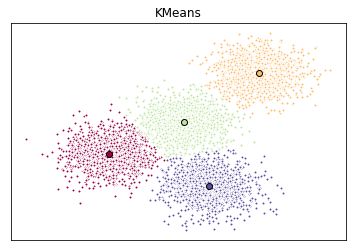

In [9]:
# # Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on the number of labels there are. 
# We use set(k_means_labels) to get the unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    
    # Create a list of all data points, where the data poitns that are in the cluster (ex. cluster 0) are 
    # labeled as true, else they are labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

## 2. Customer Segmentation with K-Means

Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. Knowing this information allows a business to devout more time and attention to retaining these customers.

In [10]:
df = pd.read_csv('Cust_Segmentation.csv')

In [11]:
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

We drop address from this dataset as this is a categorical variable. K-means algorithm is not directly applicable to categorical variables because Euclidean distance function is not really meaningful for discrete variables. 

In [12]:
df.drop('Address', axis = 1, inplace = True)

In [13]:
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

Now, let's normalize the dataset

In [14]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)

clus_dataset = StandardScaler().fit_transform(X)

In [15]:
clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

Let's apply K-means on our dataset

In [16]:
k_means = KMeans(init = 'k-means++', n_clusters = 3, n_init = 12)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
labels = k_means.labels_
labels

array([1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,

We assign the labels to each row in the dataframe

In [18]:
df['Clus_km'] = labels

In [19]:
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Clus_km  
0        0.0              6.3        1  
1        0.0             12.8        2  
2        1.0             20.9        1  
3        0.0              6.3        1  
4        0.0              7.2        0

We can easily check the centroid values by averaging the features in each cluster

In [20]:
df.groupby('Clus_km').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         410.166667  45.388889  2.666667       19.555556  227.166667   
1         432.006154  32.967692  1.613846        6.389231   31.204615   
2         403.780220  41.368132  1.961538       15.252747   84.076923   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         5.678444   10.907167   0.285714         7.322222  
1         1.032711    2.108345   0.284658        10.095385  
2         3.114412    5.770352   0.172414        10.725824

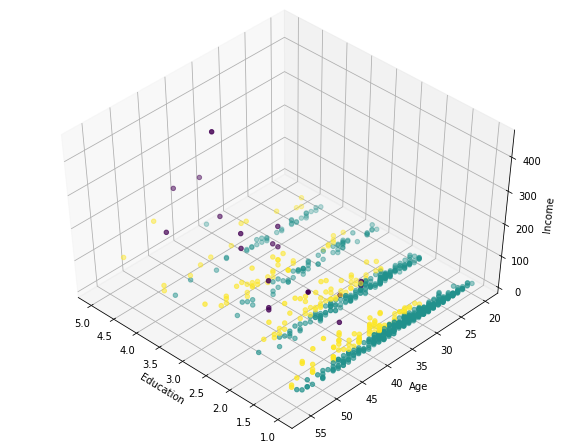

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize = (8,6))
plt.clf()

ax = Axes3D(fig, rect = [0, 0, 0.95, 1], elev = 48, azim = 134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:,1], X[:,0], X[:,3], c = labels.astype(np.float))

KMeans partitions the customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically. Now we can create a profile for each group, considering the common characteristics of each cluster. For example, the 3 clusters can be:
- affluent, educated and old aged
- middle aged and middle income
- young and low income